In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import tree
import numpy as np

In [309]:
Crops = pd.read_csv('updateddf.csv').iloc[:,1:]
Crops.loc[Crops.crop_list.isna(),'crop_list'] = 'Unknown'

In [312]:
Crops['crop_list']
Active = Crops[Crops['is_active'] == 1]

1017

In [40]:
Active[str.contains('')]

,OBJECTID,Band140per,Band1mean,Band1median,Band1thirdquart,Band1std deviation,Band1firstquart,Band240per,Band2mean,Band2median,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
0,2409443,255.0,953.378788,841.5,1658.00,699.046759,255.00,255.0,1013.369199,820.5,...,WALNUT BAYOU,1,58.00,ACRES,UNCULTIVATED AG,60.174410,M08N01E18,57.0,NaN,POLYGON ((-165851.0358000007 59930.15330000035...
1,2410507,255.0,830.337209,783.0,1389.25,576.979658,255.00,255.0,743.051197,628.0,...,WALNUT BAYOU,1,36.00,ACRES,PRUNE,37.161677,M08N01E18,57.0,NaN,POLYGON ((-165847.6331999991 59930.08139999956...
2,2421884,255.0,720.969136,684.0,1157.75,468.734722,255.00,255.0,579.990971,528.5,...,WALNUT BAYOU,1,64.00,ACRES,WALNUT,67.325080,M08N01E18,57.0,NaN,POLYGON ((-165859.6483999994 60810.99909999967...
3,2427901,255.0,799.525000,769.0,1342.25,545.081553,255.00,255.0,699.351135,632.0,...,RD. 92F,1,18.00,ACRES,PRUNE,18.593054,M08N01E18,57.0,NaN,POLYGON ((-165323.6660999991 60239.86370000057...
4,2428538,255.0,953.378788,841.5,1658.00,699.046759,255.00,255.0,1013.369199,820.5,...,WALNUT BAYOU,1,58.00,ACRES,"SAFFLOWER, UNCULTIVATED AG",60.174410,M08N01E18,57.0,NaN,POLYGON ((-165851.0358000007 59930.15330000035...
5,2443846,255.0,830.337209,783.0,1389.25,576.979658,255.00,255.0,743.051197,628.0,...,WALNUT BAYOU,1,36.00,ACRES,PRUNE,37.161677,M08N01E18,57.0,NaN,POLYGON ((-165847.6331999991 59930.08139999956...
6,2443847,255.0,720.969136,684.0,1157.75,468.734722,255.00,255.0,579.990971,528.5,...,WALNUT BAYOU,1,64.00,ACRES,WALNUT,67.325080,M08N01E18,57.0,NaN,POLYGON ((-165859.6483999994 60810.99909999967...
7,2445030,255.0,799.525000,769.0,1342.25,545.081553,255.00,255.0,699.351135,632.0,...,RD. 92F,1,18.00,ACRES,PRUNE,18.593054,M08N01E18,57.0,NaN,POLYGON ((-165323.6660999991 60239.86370000057...
8,2702369,0.0,0.000000,0.0,NaN,NaN,NaN,255.0,1025.125000,701.5,...,HUTCHISON DRIVE,1,100000.00,CUBIC FEET,COMM. FUMIGATN,0.440187,M08N02E17,57.0,NaN,POLYGON ((-154916.2870000005 59572.65770000033...
9,2770078,255.0,837.669643,816.0,1421.00,582.892486,255.00,255.0,763.372703,635.0,...,WILLOWPOINT ROAD,1,43.00,ACRES,ALFALFA,46.672966,M07N03E24,57.0,57,POLYGON ((-138467.6105000004 47327.77769999951...


In [49]:
fullyactive = Active.drop(Active[Active['crop_list'].str.contains('UNCULTIVATED') ].index)


nona = fullyactive.iloc[:,1:61].dropna()

In [227]:
Unsurestatus = Active[Active['crop_list'].str.contains('UNCULTIVATED')]

In [335]:
Uncultivated = Active[Active['crop_list'] == 'UNCULTIVATED AG']

In [369]:
letstrain = pd.concat([unknowns,Uncultivated])
fullx = letstrain.iloc[:,1:61].dropna()
fully = letstrain.loc[fullx.index,'is_active']

In [370]:
fully = np.where(letstrain.loc[fullx.index,'crop_list'].str.contains('Unknown'),0,1)
fully

array([0, 0, 0, ..., 1, 1, 1])

In [145]:
from sklearn.metrics import confusion_matrix

In [292]:
tn, fp, fn, tp = confusion_matrix(Y_test,Y_pred).ravel()

In [935]:
(tn,fp,fn,tp)


(300, 53, 45, 2500)

In [299]:

testingdf = Unsurestatus.iloc[:,1:61].dropna()

preds = clf.predict(Unsurestatus.iloc[:,1:61].dropna())







In [300]:
unsurepreds = Unsurestatus.loc[testingdf.index,:]

In [878]:
#unsurepreds[unsurepreds['isactiveimpute'] == 0][['crop_list','OBJECTID']]


set(fullyactive.crop_list)

{'ALFALFA',
 'ALFALFA GRASS M',
 'ALFALFA, SAFFLOWER',
 'ALFALFA, WHEAT',
 'ALMOND',
 'ALMOND, APRICOT, CHERRY, NECTARINE, PEACH, PRUNE',
 'ALMOND, BEEHIVE',
 'ALMOND, FORAGE HAY/SLGE',
 'APPLE',
 'APPLE, APRICOT, CHERRY, PEACH',
 'APRICOT',
 'APRICOT, CHERRY, PEACH',
 'APRICOT, NECTARINE, PEACH',
 'BARLEY',
 'BEAN DRIED',
 'BEAN DRIED, WHEAT',
 'BEEHIVE',
 'BEEHIVE, UNCUL NON-AG',
 'BLACKBERRY',
 'BLUEBERRY',
 'BROCCOLI, MELON',
 'CABBAGE SEED, ONION SEED, CARROT SEED',
 'CANTALOUPE',
 'CHERRY',
 'CHESTNUT',
 'CITRUS',
 'COMM. FUMIGATN',
 'CORN FOR/FOD',
 'CORN SEED, SAFFLOWER SEED',
 'CORN, HUMAN CON',
 'CUCUMBER',
 'CUCUMBER SEED',
 'DITCH, BANK',
 'FIG',
 'FORAGE HAY/SLGE',
 'FRUIT, BERRY',
 'FRUIT, BERRY, CHERRY, POMEGRANATE',
 'FUMIGATN, OTHER',
 'GARBANZO BEAN',
 'GP-FLWRNG PLANT',
 'GRAPE',
 'GRAPE, WINE',
 'GRASS SEED, UNCUL NON-AG',
 'HEMP/CANNABIS',
 'HOPS',
 'INDUSTRIAL SITE',
 'KIWI',
 'LANDSCAPE MAIN',
 'MELON SEED',
 'N-GRNHS PLANT',
 'N-GRNHS TRANSPL',
 'N-OUTDR FLOWERS

In [535]:
#CbandDensity= pd.read_csv('ColorbandsDF.csv',)
nonones = CbandDensity[pd.notna(CbandDensity['crop_list'])]
#hold = pd.DataFrame(['UNCULTIVATED' in i for i in nonones.crop_list ],index=nonones.index)


tomatoandalfalfa = fullyactive[fullyactive.crop_list.str.contains('ALMOND') | fullyactive.crop_list.str.contains('WALNUT')] 
colorbands = tomatoandalfalfa.iloc[:,:61]
colorbands['crop_list'] = tomatoandalfalfa.crop_list
colorbands.loc[colorbands.crop_list.str.contains('ALMOND'),'crop_list']  = 'ALMOND'
nona= colorbands.dropna()
fullx = nona.iloc[:,1:-1]
fully = np.where(colorbands['crop_list'] == 'ALMOND',0,1)
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)
clfs = LogisticRegression()
clfs.fit(X_train,Y_train)
sv = clfs.predict(X_test)
clfs.score(X_test,Y_test)

0.8685121107266436

In [521]:
clfs.coef_.argmax()

59

In [522]:
X_test.columns[59]

'Band10firstquart'

In [447]:
j = 0
for i in clfs.coef_[0]:
    
    print(j,i)
    j +=1

0 0.0025749447329205854
1 0.003997120152933425


In [34]:
nonones.loc[nonones['crop_list'].str.contains('UNCULTIVATED'),'crop_list'] = 'UNCULTIVATED'

/Users/ryanbrady/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [219]:
from sklearn.ensemble import ExtraTreesClassifier
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)
clf = ExtraTreesClassifier()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.9658385093167702

In [552]:
tomats = Active[Active.crop_list.str.contains('TOMATO')]

In [781]:
lottacrop = Active[Active.crop_list.str.contains('OAT')|fullyactive.crop_list.str.contains('SUNFLOWER')  | fullyactive.crop_list.str.contains('ALMOND') | fullyactive.crop_list.str.contains('GRAPE') | fullyactive.crop_list.str.contains('WALNUT') | fullyactive.crop_list.str.contains('RICE') | fullyactive.crop_list.str.contains('ALFALFA')| fullyactive.crop_list.str.contains('ALFALFA') | fullyactive.crop_list.str.contains('CORN')| fullyactive.crop_list.str.contains('WHEAT')| fullyactive.crop_list.str.contains('TOMATO')  | fullyactive.crop_list.str.contains('SAFFLOWER')]






In [755]:
nonorg = lottacrop.drop(lottacrop.crop_list[lottacrop.crop_list.str.contains('ORG')].index)

In [785]:
lottacrop.crops = lottacrop.copy(lottacrop.crop_list)
lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALMOND')] = 'ALMOND'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('GRAPE')] = 'GRAPE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('OAT')] = 'OAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('RICE')] = 'RICE'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WALNUT')] = 'WALNUT'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('CORN')] = 'CORN'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('WHEAT')] = 'WHEAT'
lottacrop.crop_list[lottacrop['crop_list'].str.contains('TOMATO')] = 'TOMATO'

lottacrop.crop_list[lottacrop['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'








ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [756]:
nonorg.crop_list[nonorg['crop_list'].str.contains('ALMOND')] = 'ALMOND'
nonorg.crop_list[nonorg['crop_list'].str.contains('GRAPE')] = 'GRAPE'
nonorg.crop_list[nonorg['crop_list'].str.contains('OAT')] = 'OAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('RICE')] = 'RICE'
nonorg.crop_list[nonorg['crop_list'].str.contains('SUNFLOWER')] = 'SUNFLOWER'
nonorg.crop_list[nonorg['crop_list'].str.contains('WALNUT')] = 'WALNUT'
nonorg.crop_list[nonorg['crop_list'].str.contains('ALFALFA')] = 'ALFALFA'

nonorg.crop_list[nonorg['crop_list'].str.contains('CORN')] = 'CORN'
nonorg.crop_list[nonorg['crop_list'].str.contains('WHEAT')] = 'WHEAT'
nonorg.crop_list[nonorg['crop_list'].str.contains('TOMATO')] = 'TOMATO'

nonorg.crop_list[nonorg['crop_list'].str.contains('SAFFLOWER')] = 'SAFFLOWER'











/Users/ryanbrady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/ryanbrady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ryanbrady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doi

In [ ]:
OAT 338
SAFFLOWER 348
CORN 355
WALNUT 600
GRAPE 676
RICE 773
UNKNOWN 1021
ALMOND 1099
SUNFLOWER SEED 1216
WHEAT 1323
UNCULTIVATED AG 1444
ALFALFA 1541
TOMATO PROCESS 1702

In [763]:
nonorg['code'] = nonorg.crop_list.astype('category').cat.codes

In [932]:
fullx = nonorg.loc[:,['Band3std deviation','Band3median']].dropna()
fully = nonorg.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

In [933]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 25

RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier
extra = ExtraTreesClassifier()


clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')
clf.fit(X_train, Y_train)
neigh = RadiusNeighborsClassifier(radius=3000.0)
RFF = RadiusNeighborsClassifier()
extra.fit(X_train,Y_train)
#DTC.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)
tester = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [934]:
preds = tester.predict(X_test)

print(tester.score(X_test,Y_test))
print(clf.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
#print(DTC.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))



0.2230563002680965
0.7463806970509383
0.7485254691689008
0.7270777479892762


In [842]:
lottacrop['code'] = lottacrop.crop_list.astype('category').cat.codes
fullx = lottacrop.iloc[:,1:61].dropna()
fully = lottacrop.loc[fullx.index,'code']
fully.shape
X_train, X_test, Y_train, Y_test = train_test_split(fullx,fully,test_size = .4)

/Users/ryanbrady/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [843]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 25

RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier
extra = ExtraTreesClassifier()


clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance',algorithm='ball_tree')
clf.fit(X_train, Y_train)
neigh = RadiusNeighborsClassifier(radius=3000.0)
RFF = RadiusNeighborsClassifier()
extra.fit(X_train,Y_train)
#DTC.fit(X_train,Y_train)
RFC.fit(X_train,Y_train)


tester = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, Y_train)

In [797]:
importances = extra.feature_importances_
std = np.std([extra.feature_importances_ for tree in extra.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [809]:
X_train.shape[1]
importances[indices][:58]

array([0.04290905, 0.0390709 , 0.03494634, 0.03374413, 0.03222272,
       0.03078271, 0.03074085, 0.03004672, 0.02891529, 0.02835637,
       0.02782712, 0.02758571, 0.0272452 , 0.02721876, 0.02687348,
       0.02592916, 0.02544191, 0.02506658, 0.02469739, 0.02301303,
       0.02271532, 0.02265532, 0.02258652, 0.02258527, 0.02246966,
       0.02236035, 0.02214154, 0.02141325, 0.02074555, 0.02004961,
       0.01946737, 0.01939208, 0.01936974, 0.01898903, 0.01824556,
       0.01809277, 0.01711648, 0.01680485, 0.01342791, 0.01327269,
       0.011181  , 0.00070409, 0.00042863, 0.00040067, 0.00039443,
       0.00035689, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

Feature ranking:
1. feature 13 (0.042909)
2. feature 33 (0.039071)
3. feature 8 (0.034946)
4. feature 27 (0.033744)
5. feature 40 (0.032223)


TypeError: 'int' object is not subscriptable

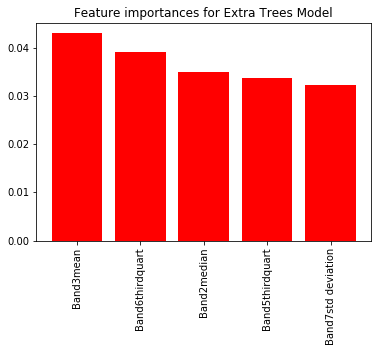

In [829]:
print("Feature ranking:")

for f in range(5):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances for Extra Trees Model")
plt.bar(range(5), importances[indices][:5],
       color="r", yerr=std[indices][:5], align="center")
plt.xticks(range(5), X_train.columns[indices[:5]],rotation = 90)
plt.ylabel = 'Importance'
plt.xlabel = 'Features'
plt.xlim([-1, X_train.shape[1][:5]])

plt.show()

In [844]:
extrapreds = extra.predict(X_test)

In [845]:
confusion_matrix(Y_test,extrapreds)

array([[544,   4,   0,  11,   1,   0,   0,   0,   0,   2,   5],
       [ 21, 313,   0,  16,  11,   0,   0,   0,   0,   5,   0],
       [  0,   2,   4,   0,   0,   0,   0,   0,   0,   1,   0],
       [ 21,  15,   0, 219,   1,   0,   0,   0,   0,   4,   3],
       [  6,   7,   0,   0, 130,   0,   1,   0,   0,   0,   2],
       [  2,   2,   0,   2,   0, 142,   0,   0,   0,   0,   0],
       [  3,   0,   0,   3,   5,   1,  16,   0,   0,   1,   1],
       [  0,   0,   0,   0,   0,   0,   0,  12,   1,   0,   0],
       [  6,   0,   0,   4,   0,   3,   0,   0,  22,   0,   0],
       [ 16,  20,   0,   8,   0,   3,   0,   0,   0, 167,   1],
       [  7,   0,   0,   1,  10,   0,   2,   0,   0,   0, 129]])

In [847]:
preds = tester.predict(X_test)

print(tester.score(X_test,Y_test))
print(clf.score(X_test,Y_test))
print(extra.score(X_test,Y_test))
#print(DTC.score(X_test,Y_test))
print(RFC.score(X_test,Y_test))






0.6322846828261991
0.8313563692625064
0.8757091284167097
0.8607529654461062


In [711]:
confusion_matrix(Y_test,preds)

array([[555,   6,  10,   1,   0,   1,   0],
       [ 24, 315,  10,   8,   0,   0,   9],
       [ 20,  11, 207,   0,   0,   0,   5],
       [  7,   6,   1,  29,   1,   0,   2],
       [  5,   2,   2,   0, 153,   0,   1],
       [  2,   1,   0,   0,   0,  11,   0],
       [ 13,  21,   9,   0,   6,   0, 171]])

Alfalfa:0
Almond:1
Grape:2
Oat:3
Rice:4
Sunflower:5
Tomato:6
Walnut :7


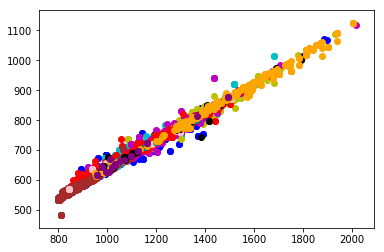

In [911]:
colors = ['b', 'c', 'y', 'm', 'r','brown','pink','teal','black','orange','purple']
for i,j in zip(set(nonorg.crop_list),colors):
    plt.scatter(nonorg.loc[nonorg['crop_list'] == i,['Band2thirdquart']],nonorg.loc[nonorg['crop_list'] == i,['Band2mean']],color = j)